In [2]:
!pip install ipython-autotime
%load_ext autotime

## Using UMAP to reduce dimensionality of data
#### Uniform Manifold Approximation and Projection

Here, we use the UMAP algorithm to reduce the dimensionality of the data, for visualization and cluster prediction. The UMAP algorithm is a "general non-linear dimensionality reduction technique", from the paper of McInnes L, Healy J. 

The method is based on the following assumptions(McInnes et. al, 2018):

1. The data is uniformly distributed on a Riemannian manifold;
2. The Riemannian metric is locally constant (or can be approximated as such);
3. The manifold is locally connected.

> From these assumptions it is possible to model the manifold with a fuzzy topological structure. The embedding is found by searching for a low dimensional projection of the data that has the closest possible equivalent fuzzy topological structure.


Citation: `McInnes, L, Healy, J, UMAP: Uniform Manifold Approximation and Projection for Dimension Reduction, ArXiv e-prints 1802.03426, 2018`

Link to GIT Repo: <https://github.com/lmcinnes/umap>

In [3]:
!pip install umap-learn

time: 2.93 s


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
time: 3.32 ms


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bz2
import os

time: 1.74 ms


### Importing the data from the Pickle file

In [10]:
# In case you want to do different number of dimensions for TSNE, you can import the objects back using the following code
import pickle
# Getting back the objects:
with open('/content/drive/My Drive/Colab Notebooks/objs2.pkl', 'rb') as f:  # Python 3: open(..., 'rb')
    train_texts, train_labels, test_texts, test_labels, train_texts_vec, test_texts_vec = pickle.load(f)

time: 29.7 s


Taking a subset of 100k rows

In [15]:
train_da = train_texts_vec[:100000,].copy()

time: 68.2 ms


Using the UMAP function from the library

In [17]:
import umap

train_texts_umap = umap.UMAP(random_state=42).fit(train_da)

# Saving the newest objects
import pickle

# Saving the objects: 
with open('/content/drive/My Drive/Colab Notebooks/objs_umap2.pkl', 'wb') as f:  # Python 3: open(..., 'wb')
    pickle.dump([train_texts_umap], f)

/usr/local/lib/python3.6/dist-packages/umap/sparse.py:247: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../usr/local/lib/python3.6/dist-packages/umap/utils.py", line 409:
@numba.njit(parallel=True)
def build_candidates(current_graph, n_vertices, n_neighbors, max_candidates, rng_state):
^

  current_graph, n_vertices, n_neighbors, max_candidates, rng_state
/usr/local/lib/python3.6/dist-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../usr/local/lib/python3.6/dist-packages/umap/sparse.

time: 23min 15s


### Plotting the Dimensional Reduced dataset using UMAP

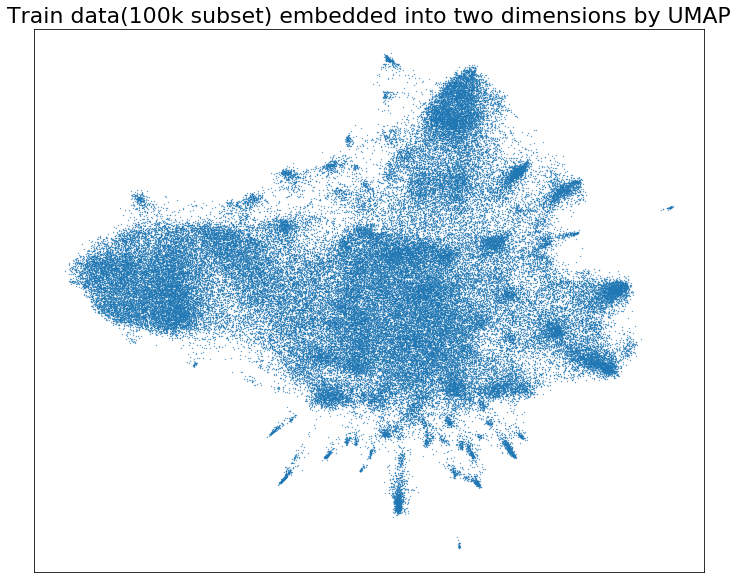

time: 1.04 s


In [26]:
import matplotlib.pyplot as plt

embed = train_texts_umap.embedding_ 
fig, ax = plt.subplots(figsize=(12, 10))
plt.scatter(embed[:, 0], embed[:, 1], cmap="Spectral", s=0.1)
plt.setp(ax, xticks=[], yticks=[])
plt.title("Train data(100k subset) embedded into two dimensions by UMAP", fontsize=22);
plt.savefig("UMAP100kRows.png");


Saving the Objects

In [23]:
with open('/content/drive/My Drive/Colab Notebooks/objs_umap3.pkl', 'wb') as f:  # Python 3: open(..., 'wb')
    pickle.dump([train_texts_umap, embed], f)

time: 23.2 s


**In case you need to import these objects again, please feel free to use the code below.**

In [0]:
with open('/content/drive/My Drive/Colab Notebooks/objs_umap3.pkl', 'rb') as f:  # Python 3: open(..., 'rb')
    train_texts_umap, embed = pickle.load(f)